In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('/Users/Sangeetha/Documents/data-science/side-projects/prohack/train.csv')

In [27]:
df_test = pd.read_csv('/Users/Sangeetha/Documents/data-science/side-projects/prohack/test.csv')

In [31]:
df_test.isnull().sum().sum()

19834

In [4]:
df.head()

galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                           NaN   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                       NaN   
1                                  4.742470   
2                                  5.583973   
3                                       NaN   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  ...  \
0                                    NaN              NaN  ...   
1                               0.833624         0.467873  ...   
2                               0.469110         0.363837  ...   
3                                    NaN              NaN  ...   
4                               0.910341         0.918353  ...   

   Intergalactic Development Index (IDI), female  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   Intergalactic Development Index (IDI), male  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Gender Development Index (GDI)  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

   Intergalactic Development Index (IDI), female, Rank  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
0                                                NaN                    NaN   
1                                                NaN              19.177926   
2                                                NaN              21.151265   
3                                                NaN                    NaN   
4                                                NaN                    NaN   

   Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total  \
0                                                NaN                           
1                                                NaN                           
2                                           6.534020                           
3                                           5.912194                           
4                                  

### Plots

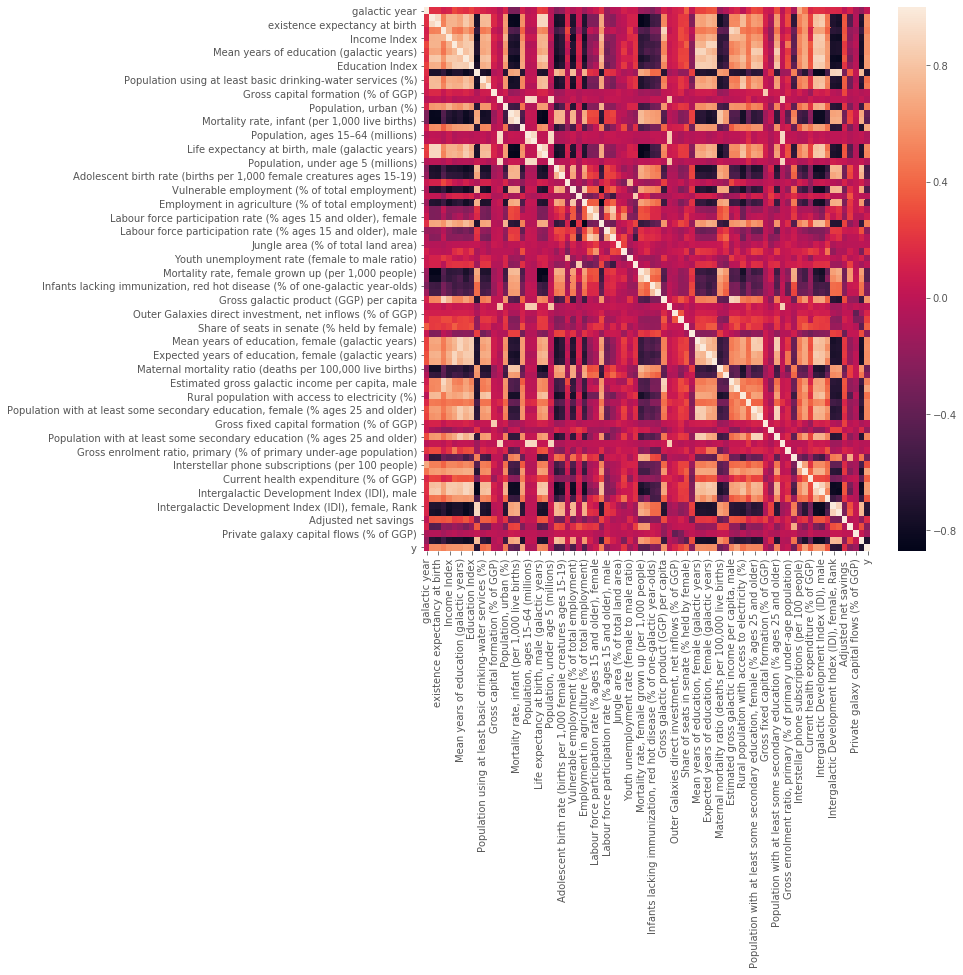

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

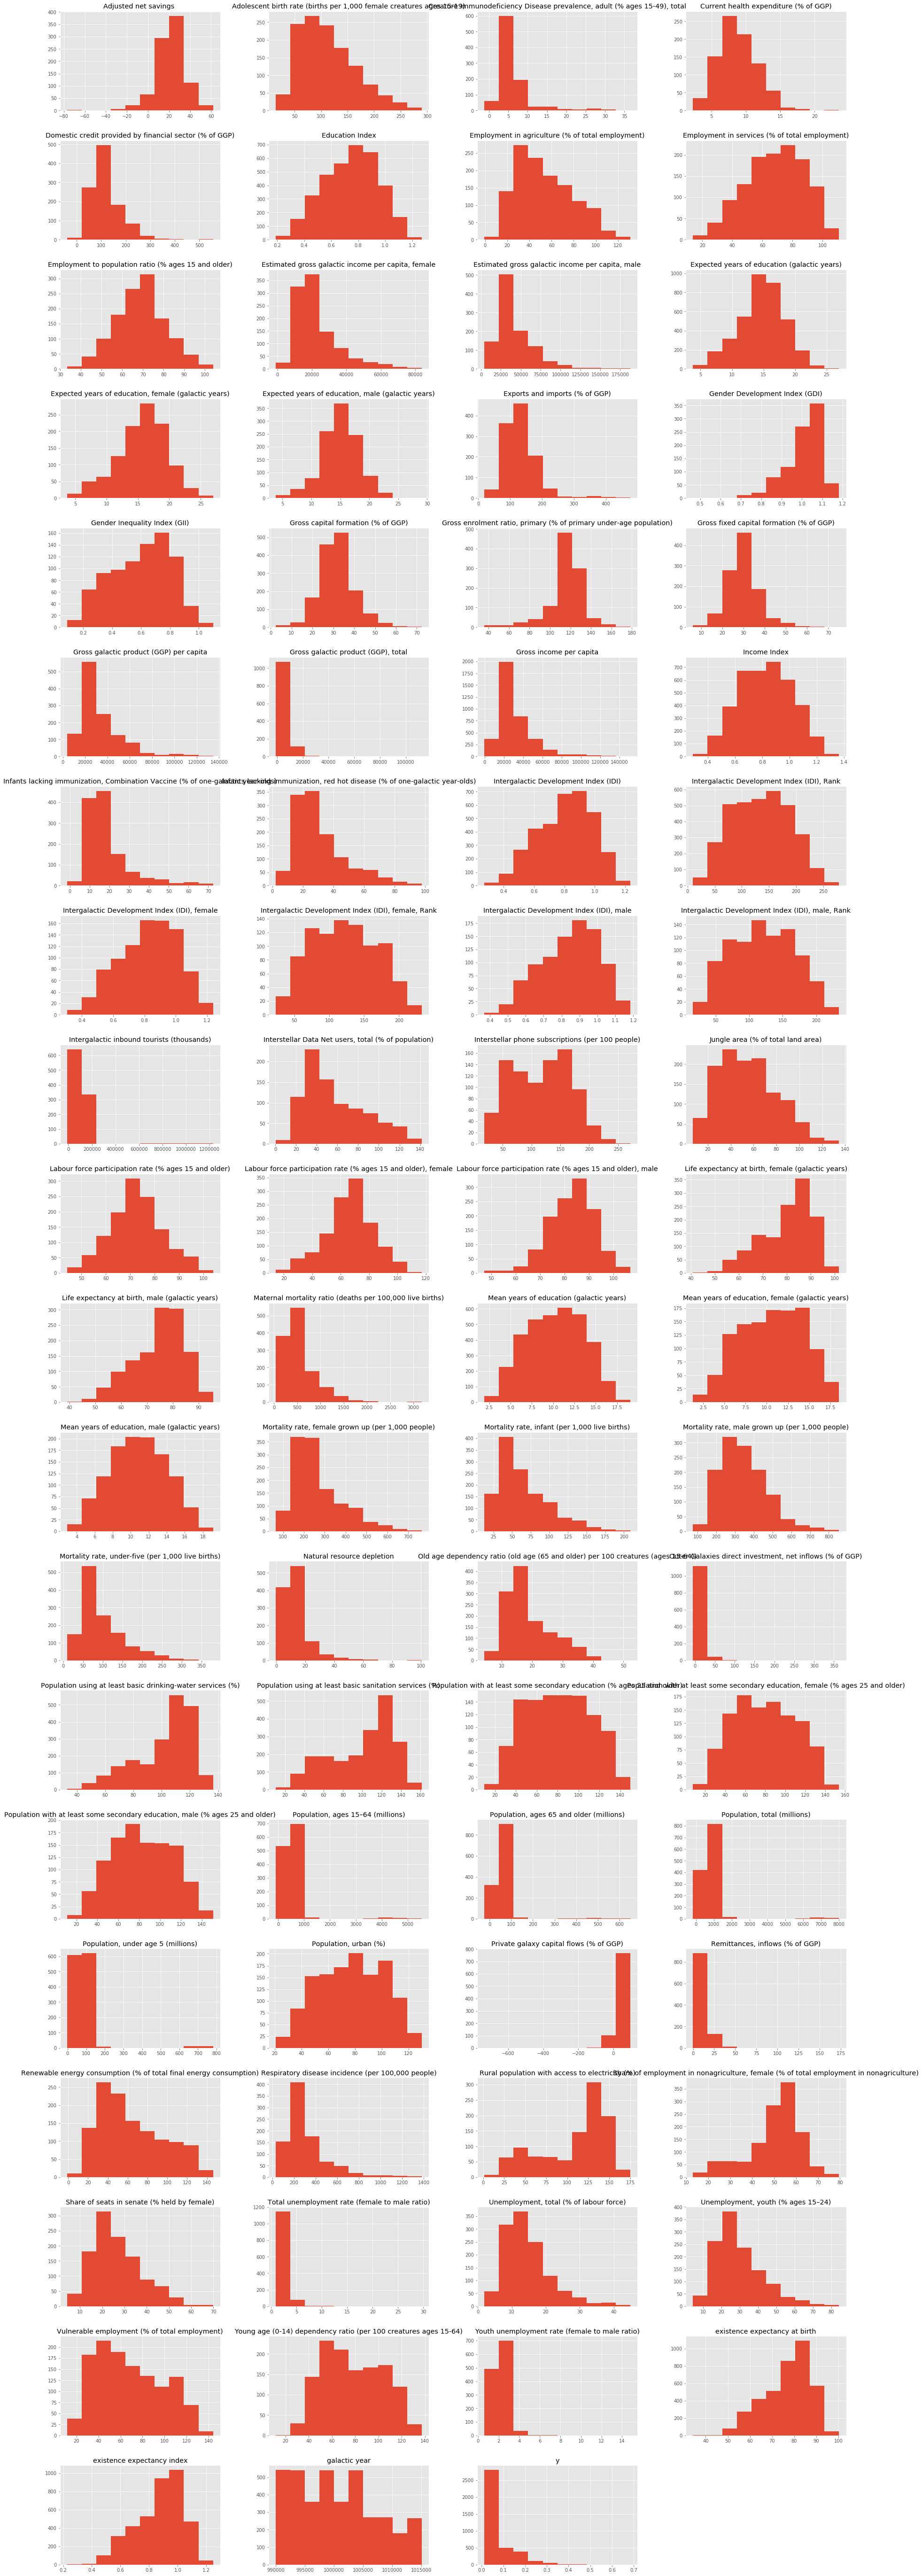

In [6]:
df.hist(figsize=(30,100), layout=(20,4))
plt.show()

In [1]:
"""fig, ax = plt.subplots(20, 4, figsize=(20, 20))
fig.subplots_adjust(hspace=.5, wspace=0.5)
ax = ax.ravel()
for cat in df.corr()['y'][:-1]:
    ax[ind].scatter(x=df[val],y=df['y'])
    ax[ind].set_title(' {} vs y'.format(val))"""

"fig, ax = plt.subplots(20, 4, figsize=(20, 20))\nfig.subplots_adjust(hspace=.5, wspace=0.5)\nax = ax.ravel()\nfor cat in df.corr()['y'][:-1]:\n    ax[ind].scatter(x=df[val],y=df['y'])\n    ax[ind].set_title(' {} vs y'.format(val))"

### Corr functions

In [8]:
def calculate_corr_df(df):
    corr_list = []
    for col in df.columns[2:-1]:
        
        nulls = df[col].isnull().sum()
        nulls_per = nulls/3865
        corr_to_y = df.corr()['y'][col]
        abs_corr_to_y = abs(corr_to_y)
        corr = df.corr()[col].sort_values(ascending=False)[1]
        corr_index = df.corr()[col].sort_values(ascending=False).index[1]

        corr_list.append((col, nulls, nulls_per, corr_to_y,
                         abs_corr_to_y, corr, corr_index))

    return pd.DataFrame(corr_list, columns= 
                           ['col_name', 'nulls', 'nulls_per', 'corr_to_y', 'abs_corr_to_y', 
                            'highest_corr', 'highest_corr_col'])
    

In [9]:
# Dropping all of the columns below 0.40 abs correlation to y
corr_df = calculate_corr_df(df)
cols_below_min_corr = list(corr_df[corr_df.abs_corr_to_y < 0.40].sort_values(
    by=['abs_corr_to_y', 'nulls_per'], ascending=[True, False]).col_name)
cols_below_min_corr

['Unemployment, youth (% ages 15–24)',
 'Gross galactic product (GGP), total',
 'Gross capital formation (% of GGP)',
 'Gross fixed capital formation (% of GGP)',
 'Jungle area (% of total land area)',
 'Gross enrolment ratio, primary (% of primary under-age population)',
 'Unemployment, total (% of labour force)',
 'Intergalactic inbound tourists (thousands)',
 'Employment to population ratio (% ages 15 and older)',
 'Labour force participation rate (% ages 15 and older)',
 'Population, ages 65 and older (millions)',
 'Population, total (millions)',
 'Population, ages 15–64 (millions)',
 'Labour force participation rate (% ages 15 and older), female',
 'Population, under age 5 (millions)',
 'Total unemployment rate (female to male ratio)',
 'Private galaxy capital flows (% of GGP)',
 'Outer Galaxies direct investment, net inflows (% of GGP)',
 'Youth unemployment rate (female to male ratio)',
 'Adjusted net savings ',
 'Remittances, inflows (% of GGP)',
 'Share of employment in nonagr

In [10]:
len(cols_below_min_corr)

36

In [11]:
df.drop(columns = cols_below_min_corr, inplace=True)
df

galactic year                        galaxy  existence expectancy index  \
0            990025  Large Magellanic Cloud (LMC)                    0.628657   
1            990025              Camelopardalis B                    0.818082   
2            990025                       Virgo I                    0.659443   
3            990025            UGC 8651 (DDO 181)                    0.555862   
4            990025                  Tucana Dwarf                    0.991196   
...             ...                           ...                         ...   
3860        1015056                     Columba I                    1.029704   
3861        1015056  Leo II Dwarf (Leo B, DDO 93)                    0.937869   
3862        1015056        Canes Venatici I Dwarf                    1.036144   
3863        1015056                         KKs 3                    0.939034   
3864        1015056                      NGC 5237                    1.032244   

      existence expectancy at birth  Gross income per capita  Income Index  \
0                         63.125200             27109.234310      0.646039   
1                         81.004994             30166.793958      0.852246   
2                         59.570534              8441.707353      0.499762   
3                         52.333293                      NaN           NaN   
4                         81.802464             81033.956906      1.131163   
...                             ...                      ...           ...   
3860                      82.832063             34310.471408      0.855094   
3861                      75.877098             36899.067719      0.929494   
3862                      93.540275             37002.977875      1.085245   
3863                      78.274427             28180.459770      0.687655   
3864                      91.641356             73109.215949      1.207746   

      Expected years of education (galactic years)  \
0                                         8.240543   
1                                        10.671823   
2                                         8.840316   
3                                              NaN   
4                                        13.800672   
...                                            ...   
3860                                     18.578586   
3861                                     16.153857   
3862                                     21.066473   
3863                                      9.388911   
3864                                     18.910920   

      Mean years of education (galactic years)  \
0                                          NaN   
1                                     4.742470   
2                                     5.583973   
3                                          NaN   
4                                    13.188907   
...                                        ...   
3860                                 10.557143   
3861                                  9.151665   
3862                                 16.661344   
3863                                  8.908748   
3864                                 16.202486   

      Intergalactic Development Index (IDI)  Education Index  ...  \
0                                       NaN              NaN  ...   
1                                  0.833624         0.467873  ...   
2                                  0.469110         0.363837  ...   
3                                       NaN              NaN  ...   
4                                  0.910341         0.918353  ...   
...                                     ...              ...  ...   
3860                               0.906573         0.862826  ...   
3861                               0.865822         0.747577  ...   
3862                               0.983835         1.100779  ...   
3863                               0.735694         0.602703  ...   
3864                               1.171634         1.085080  ...   

      Population 

In [17]:
corr_df = calculate_corr_df(df)

In [20]:
cols_male_female = list(corr_df[new_corr_df.col_name.str.contains('female|male' , regex=True)].col_name)
cols_male_female

['Life expectancy at birth, male (galactic years)',
 'Life expectancy at birth, female (galactic years)',
 'Adolescent birth rate (births per 1,000 female creatures ages 15-19)',
 'Mortality rate, female grown up (per 1,000 people)',
 'Mortality rate, male grown up (per 1,000 people)',
 'Mean years of education, female (galactic years)',
 'Mean years of education, male (galactic years)',
 'Expected years of education, female (galactic years)',
 'Expected years of education, male (galactic years)',
 'Estimated gross galactic income per capita, male',
 'Estimated gross galactic income per capita, female',
 'Population with at least some secondary education, female (% ages 25 and older)',
 'Population with at least some secondary education, male (% ages 25 and older)',
 'Intergalactic Development Index (IDI), female',
 'Intergalactic Development Index (IDI), male',
 'Intergalactic Development Index (IDI), female, Rank',
 'Intergalactic Development Index (IDI), male, Rank']

In [21]:
# Dropping all of the columns containing female or male as their closest corr cols where generic cols 
# regardless of gender 
df.drop(columns = cols_male_female, inplace=True)
df

galactic year                        galaxy  existence expectancy index  \
0            990025  Large Magellanic Cloud (LMC)                    0.628657   
1            990025              Camelopardalis B                    0.818082   
2            990025                       Virgo I                    0.659443   
3            990025            UGC 8651 (DDO 181)                    0.555862   
4            990025                  Tucana Dwarf                    0.991196   
...             ...                           ...                         ...   
3860        1015056                     Columba I                    1.029704   
3861        1015056  Leo II Dwarf (Leo B, DDO 93)                    0.937869   
3862        1015056        Canes Venatici I Dwarf                    1.036144   
3863        1015056                         KKs 3                    0.939034   
3864        1015056                      NGC 5237                    1.032244   

      existence expectancy at birth  Gross income per capita  Income Index  \
0                         63.125200             27109.234310      0.646039   
1                         81.004994             30166.793958      0.852246   
2                         59.570534              8441.707353      0.499762   
3                         52.333293                      NaN           NaN   
4                         81.802464             81033.956906      1.131163   
...                             ...                      ...           ...   
3860                      82.832063             34310.471408      0.855094   
3861                      75.877098             36899.067719      0.929494   
3862                      93.540275             37002.977875      1.085245   
3863                      78.274427             28180.459770      0.687655   
3864                      91.641356             73109.215949      1.207746   

      Expected years of education (galactic years)  \
0                                         8.240543   
1                                        10.671823   
2                                         8.840316   
3                                              NaN   
4                                        13.800672   
...                                            ...   
3860                                     18.578586   
3861                                     16.153857   
3862                                     21.066473   
3863                                      9.388911   
3864                                     18.910920   

      Mean years of education (galactic years)  \
0                                          NaN   
1                                     4.742470   
2                                     5.583973   
3                                          NaN   
4                                    13.188907   
...                                        ...   
3860                                 10.557143   
3861                                  9.151665   
3862                                 16.661344   
3863                                  8.908748   
3864                                 16.202486   

      Intergalactic Development Index (IDI)  Education Index  ...  \
0                                       NaN              NaN  ...   
1                                  0.833624         0.467873  ...   
2                                  0.469110         0.363837  ...   
3                                       NaN              NaN  ...   
4                                  0.910341         0.918353  ...   
...                                     ...              ...  ...   
3860                               0.906573         0.862826  ...   
3861                               0.865822         0.747577  ...   
3862                               0.983835         1.100779  ...   
3863                               0.735694         0.602703  ...   
3864                               1.171634         1.085080  ...   

      Vulnerable 

In [22]:
corr_df = calculate_corr_df(df)
corr_df

col_name  nulls  nulls_per  \
0                          existence expectancy index      1   0.000259   
1                       existence expectancy at birth      1   0.000259   
2                             Gross income per capita     28   0.007245   
3                                        Income Index     28   0.007245   
4        Expected years of education (galactic years)    133   0.034411   
5            Mean years of education (galactic years)    363   0.093920   
6               Intergalactic Development Index (IDI)    391   0.101164   
7                                     Education Index    391   0.101164   
8         Intergalactic Development Index (IDI), Rank    433   0.112031   
9   Population using at least basic drinking-water...   1844   0.477102   
10  Population using at least basic sanitation ser...   1850   0.478655   
11                              Population, urban (%)   2594   0.671151   
12     Mortality rate, infant (per 1,000 live births)   2606   0.674256   
13  Old age dependency ratio (old age (65 and olde...   2601   0.672962   
14  Young age (0-14) dependency ratio (per 100 cre...   2601   0.672962   
15      Vulnerable employment (% of total employment)   2628   0.679948   
16  Employment in agriculture (% of total employment)   2628   0.679948   
17     Employment in services (% of total employment)   2628   0.679948   
18            Gross galactic product (GGP) per capita   2663   0.689004   
19    Rural population with access to electricity (%)   2836   0.733765   
20  Domestic credit provided by financial sector (...   2786   0.720828   
21  Population with at least some secondary educat...   2814   0.728072   
22  Interstellar Data Net users, total (% of popul...   2993   0.774386   
23                      Gender Inequality Index (GII)   3021   0.781630   

    corr_to_y  abs_corr_to_y  highest_corr  \
0    0.547397       0.547397      0.906977   
1    0.555757       0.555757      0.906977   
2    0.508029       0.508029      0.888550   
3    0.579969       0.579969      0.831459   
4    0.584069       0.584069      0.853470   
5    0.583858       0.583858      0.867641   
6    0.625114       0.625114      0.846585   
7    0.613938       0.613938      0.867641   
8   -0.681592       0.681592      0.772487   
9    0.429087       0.429087      0.793460   
10   0.480033       0.480033      0.831948   
11   0.477494       0.477494      0.724393   
12  -0.434110       0.434110      0.726595   
13   0.679981       0.679981      0.679981   
14  -0.533741       0.533741      0.773663   
15  -0.496568       0.496568      0.819329   
16  -0.473959       0.473959      0.819329   
17   0.492594       0.492594      0.762034   
18   0.576339       0.576339      0.888550   
19   0.439887       0.439887      0.831948   
20   0.533294       0.533294      0.610193   
21   0.517712       0.517712      0.851509   
22   0.651823       0.651823      0.701372   
23  -0.722279       0.722279      0.773663   

                                     highest_corr_col  
0                       existence expectancy at birth  
1                          existence expectancy index  
2             Gross galactic product (GGP) per capita  
3               Intergalactic Development Index (IDI)  
4                                     Education Index  
5                                     Education Index  
6                                     Education Index  
7            Mean years of education (galactic years)  
8                       Gender Inequality Index (GII)  
9     Rural population with access to electricity (%)  
10    Rural population with access to electricity (%)  
11     Employment in services (% of total employment)  
12      Vulnerable employment (% of total employment)  
13                                                  y  
14                      Gender Inequality Index (GII)  
15  Employment in agriculture (% of total employment)  
16      Vulnerable employment (% of total employment)  
17        

In [26]:
df[df['existence expectancy index'].isnull()]

galactic year    galaxy  existence expectancy index  \
144         990025  NGC 5253                         NaN   

     existence expectancy at birth  Gross income per capita  Income Index  \
144                            NaN             20429.375702      0.633556   

     Expected years of education (galactic years)  \
144                                           NaN   

     Mean years of education (galactic years)  \
144                                       NaN   

     Intergalactic Development Index (IDI)  Education Index  ...  \
144                                    NaN              NaN  ...   

     Vulnerable employment (% of total employment)  \
144                                            NaN   

     Employment in agriculture (% of total employment)  \
144                                                NaN   

     Employment in services (% of total employment)  \
144                                             NaN   

     Gross galactic product (GGP) per capita  \
144                             19798.178503   

     Rural population with access to electricity (%)  \
144                                              NaN   

     Domestic credit provided by financial sector (% of GGP)  \
144                                                NaN         

     Population with at least some secondary education (% ages 25 and older)  \
144                                                NaN                         

     Interstellar Data Net users, total (% of population)  \
144                                                NaN      

     Gender Inequality Index (GII)         y  
144                            NaN  0.045115  

[1 rows x 27 columns]